In [5]:
import sys
sys.path.append('../')

import hockeypi.games as gm
import hockeypi.teams as tm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Analyzing post-2005 NHL Seasons Regular Season Performance vs. Cup Winners

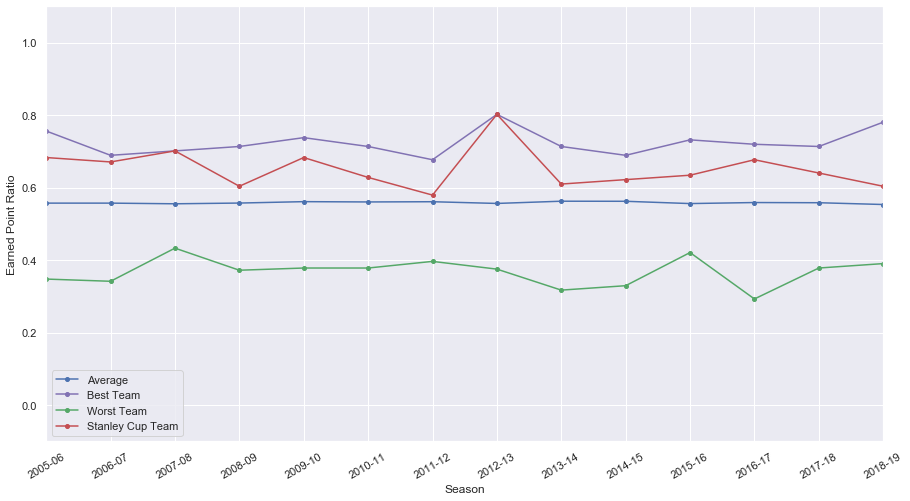

In [7]:
years = [year for year in range(2005, 2019)]
avg, top, bot, cup = [], [], [], [] 

for year in years:
    df = tm.get_all_team_statistics_by_year(year) \
            .loc[:, ['teamId', 'wins', 'losses', 'ot', 'pts']] \
            .sort_values(by='pts')[::-1].reset_index()
    cup_winner_id = gm.get_stanley_cup_winner_by_year(year)
    num_games = df.iloc[0, :]['wins'] + df.iloc[0, :]['losses'] + df.iloc[0, :]['ot']
    max_pts = num_games * 2
    avg.append(sum(df['pts'].to_list()) / (len(df) * max_pts))
    top.append(df.head(1)['pts'].item() / max_pts)
    bot.append(df.tail(1)['pts'].item() / max_pts)
    cup.append(df[df['teamId'] == cup_winner_id]['pts'].item() / max_pts)   

plt.figure(figsize=(15, 8))
plt.xticks(years, [f'{year}-{str(year+1).replace("20", "")}' for year in years], rotation=30)
plt.xlim(years[0], years[-1])
plt.ylim([-0.1, 1.1])
plt.ylabel('Earned Point Ratio')
plt.xlabel('Season')
plt.plot(years, avg, c='b', marker='o', markersize=4, label='Average')
plt.plot(years, top, c='m', marker='o', markersize=4, label='Best Team')
plt.plot(years, bot, c='g', marker='o', markersize=4, label='Worst Team')
plt.plot(years, cup, c='r', marker='o', markersize=4, label='Stanley Cup Team')
plt.legend(loc='lower left')